In [34]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42
import numpy as np
import scipy.stats as stats
import os

In [35]:
raw_file = "/lab/wengpj01/assay/data_BitterAssay_ver230919.csv"

In [36]:
os.chdir("/lab/wengpj01/assay/20231016")

In [37]:
raw = pd.read_csv(raw_file, index_col=0, usecols=lambda column: column != 'Unnamed: 0')

In [38]:
raw[0:5]

,compound,concentration,gene,group,AUC,file
well,,,,,,
A1,Buffer,0.0,Axo_1,screening,16066.121270,Data 06-09-23 1.txt
A10,Buffer,0.0,Bul_1,screening,1870.791644,Data 06-09-23 1.txt
A11,Picrotoxin,1.0,Bul_1,screening,2951.122319,Data 06-09-23 1.txt
A12,Yohimbine,0.3,Bul_1,screening,2457.810709,Data 06-09-23 1.txt
A2,Picrotoxin,1.0,Axo_1,screening,25002.525040,Data 06-09-23 1.txt


In [39]:
# def plot_all_chems(df, gene):
#     df2 = df[df["gene"]==gene]
#     unique_compounds = ['Buffer','Amarogentin', 'Arbutin', 'Aristlochic_acid', 'Camphor', 'Chloramphenicol',
#                         'Chloroquine', 'Colchicine', 'Coumarin', 'Denatonium_benzoate', 'Diphenylthiourea', 'Genistein', 
#                         'Helicin', 'Marinobufagenin', 'PROP', 'PTC', 'Papaverine', 'Picrotoxin', 'Quinine', 'Salicin', 'Strychnine',
#                         'Xanthotoxin', 'Yohimbine', 'a-thujone','AflatoxinB1','Batrachotoxin0001', 'Cinobufagin01','Heliotrine05','Swainsonine']

#     # Iterate through rows in the DataFrame
#     list_chems = []
#     for chem in unique_compounds:
#         df3 = df2[df2["compound"]==chem]
#         list_chems.append(df3["AUC"])
    
#     fig = plt.figure(figsize = (8,3))
#     ax1 = fig.add_subplot(111)
    
#     bp = ax1.boxplot(list_chems)
#     # Set the x-axis tick labels
#     ax1.set_xticks(range(1, len(unique_compounds) + 1))
#     ax1.set_xticklabels(unique_compounds, rotation=45, ha="right")
#     print(unique_compounds)

In [40]:
# plot_all_chems(raw, "Can_1")

In [41]:
def plot_all_chems(df, gene, comps = None,output_file="boxplot.pdf"):
    df2 = df[df["gene"]==gene]
    
    if comps == None:
        unique_compounds = ['Buffer','Amarogentin', 'Arbutin', 'Aristlochic_acid', 'Camphor', 'Chloramphenicol',
                        'Chloroquine', 'Colchicine', 'Coumarin', 'Denatonium_benzoate', 'Diphenylthiourea', 'Genistein', 
                        'Helicin', 'PROP', 'PTC', 'Papaverine', 'Picrotoxin', 'Quinine', 'Salicin', 'Strychnine',
                        'Xanthotoxin', 'Yohimbine', 'a-thujone','AflatoxinB1','Batrachotoxin0001', 'Cinobufagin01','Heliotrine05', 'Marinobufagenin','Swainsonine']
    else:
        unique_compounds = comps

    # Iterate through rows in the DataFrame
    list_chems = []
    for chem in unique_compounds:
        df3 = df2[df2["compound"]==chem]
        list_chems.append(df3["AUC"])
    
    if len(unique_compounds) > 10:
        fig = plt.figure(figsize = (8,3))
    elif len(unique_compounds) > 3:
        fig = plt.figure(figsize = (5,3))
    else:
        fig = plt.figure(figsize = (2,3))
    ax1 = fig.add_subplot(111)
    
#     # Define a dictionary with color options
#     box_colors = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray', fliers='Red')

    # Create a boxplot with custom colors
    #bp = ax1.boxplot(list_chems, patch_artist=True, boxprops=dict(facecolor='LightGreen', color='DarkGreen'), **box_colors)
    bp = ax1.boxplot(list_chems,
           patch_artist = True,
           boxprops = dict(facecolor = "lightblue"))
    
    bp = ax1.boxplot(list_chems)
    # Set the x-axis tick labels
    ax1.set_xticks(range(1, len(unique_compounds) + 1))
    ax1.set_xticklabels(unique_compounds, rotation=45, ha="right")
    
    # Add title and axis labels
    ax1.set_title(f'Bitter Assay for {gene}')
    ax1.set_xlabel('Compounds')
    ax1.set_ylabel('AUC Values')
    
    # Save the boxplot as a PDF file
    plt.savefig(output_file, format='pdf', bbox_inches='tight')
    
#     print(unique_compounds)

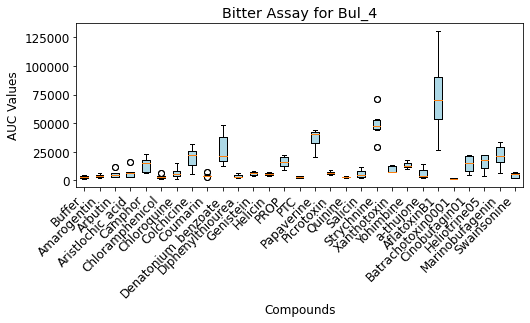

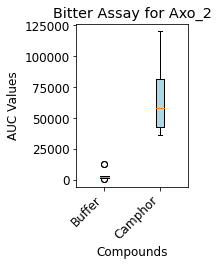

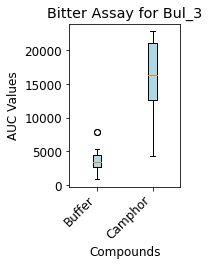

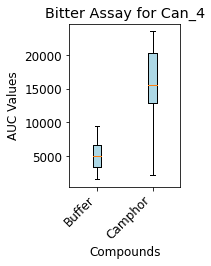

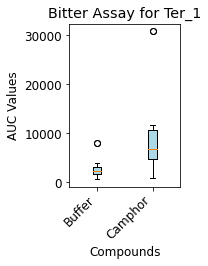

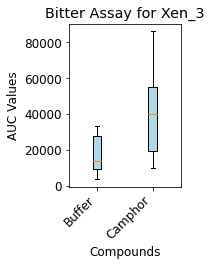

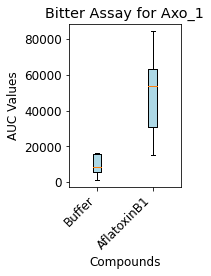

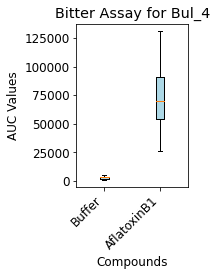

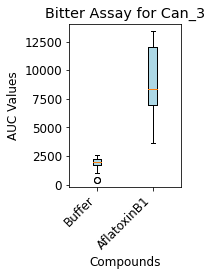

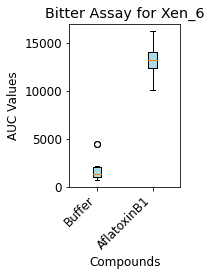

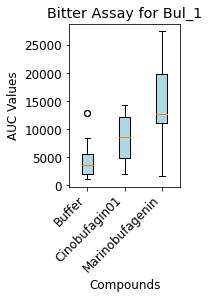

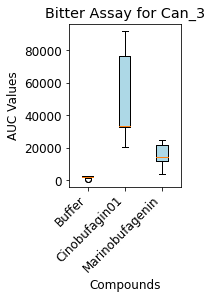

In [44]:
#plot_all_chems(df, gene, comps = None,output_file="boxplot.png")
plot_all_chems(raw, "Bul_4", comps = None,output_file="Bull_all.pdf")
plot_all_chems(raw, "Axo_2", comps = ["Buffer", "Camphor"],output_file="Axo_2_camphor.pdf")
plot_all_chems(raw, "Bul_3", comps = ["Buffer", "Camphor"],output_file="Bul_3_camphor.pdf")
plot_all_chems(raw, "Can_4", comps = ["Buffer", "Camphor"],output_file="Can_4_camphor.pdf")
plot_all_chems(raw, "Ter_1", comps = ["Buffer", "Camphor"],output_file="Ter_1_camphor.pdf")
plot_all_chems(raw, "Xen_3", comps = ["Buffer", "Camphor"],output_file="Xen_3_camphor.pdf")
plot_all_chems(raw, "Axo_1", comps = ["Buffer", "AflatoxinB1"],output_file="Axo_1_aflatoxin.pdf")
plot_all_chems(raw, "Bul_4", comps = ["Buffer", "AflatoxinB1"],output_file="Bul_4_aflatoxin.pdf")
plot_all_chems(raw, "Can_3", comps = ["Buffer", "AflatoxinB1"],output_file="Can_3_aflatoxin.pdf")
plot_all_chems(raw, "Xen_6", comps = ["Buffer", "AflatoxinB1"],output_file="Xen_6_aflatoxin.pdf")
plot_all_chems(raw, "Bul_1", comps = ["Buffer", "Cinobufagin01", "Marinobufagenin"],output_file="Bul_1_frogtox.pdf")
plot_all_chems(raw, "Can_3", comps = ["Buffer", "Cinobufagin01", "Marinobufagenin"],output_file="Can__frogtox.pdf")


In [121]:
all_compounds = ['Buffer','Amarogentin', 'Arbutin', 'Aristlochic_acid', 'Camphor', 'Chloramphenicol',
                        'Chloroquine', 'Colchicine', 'Coumarin', 'Denatonium_benzoate', 'Diphenylthiourea', 'Genistein', 
                        'Helicin', 'Marinobufagenin', 'PROP', 'PTC', 'Papaverine', 'Picrotoxin', 'Quinine', 'Salicin', 'Strychnine',
                        'Xanthotoxin', 'Yohimbine', 'a-thujone','AflatoxinB1','Batrachotoxin0001', 'Cinobufagin01','Heliotrine05','Swainsonine']

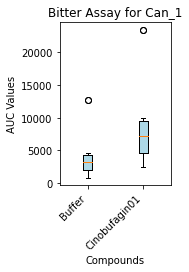

In [122]:
mini = plot_all_chems(raw, "Can_1", ["Buffer", "AflatoxinB1"])
plt.savefig(mini, format='pdf', bbox_inches='tight')

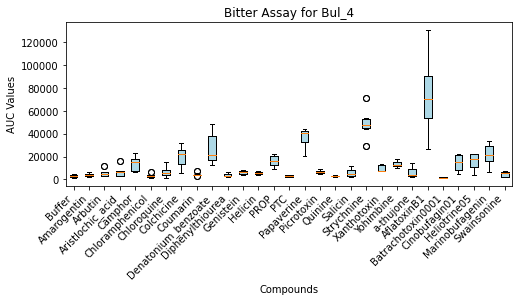

In [153]:
plot_all_chems(raw, "Bul_4")

In [104]:
def t_test(df, gene, comps):
    df2 = df[df["gene"]==gene]
    
    if len(comps) != 2:
        print ("Wrong number of compounds")
        return
    else:
        unique_compounds = comps

    # Iterate through rows in the DataFrame
    list_chems = []
    for chem in unique_compounds:
        df3 = df2[df2["compound"]==chem]
        list_chems.append(df3["AUC"])
    
    t_stat, p_value = stats.ttest_ind(list_chems[0], list_chems[1])
    
    
    return p_value

In [107]:
t_test(raw, "Can_1", ["Buffer", "Cinobufagin01"])

0.12765342045764014

In [116]:
# Assuming 'raw' is your DataFrame
unique_genes = raw['gene'].unique()

# Create a directory if it doesn't exist
output_dir = '/lab/wengpj01/assay/20231012'
os.makedirs(output_dir, exist_ok=True)

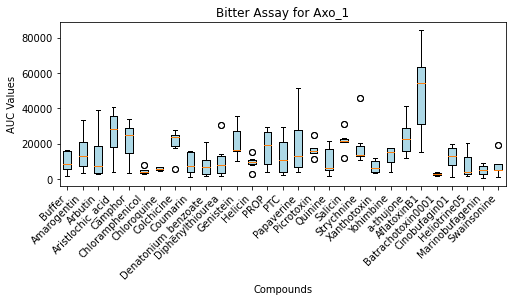

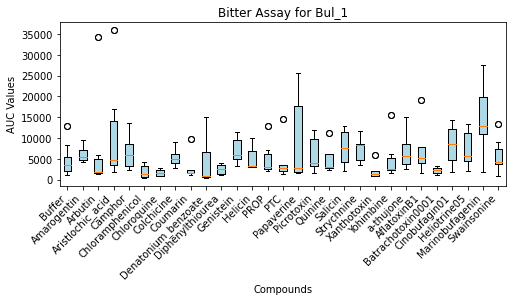

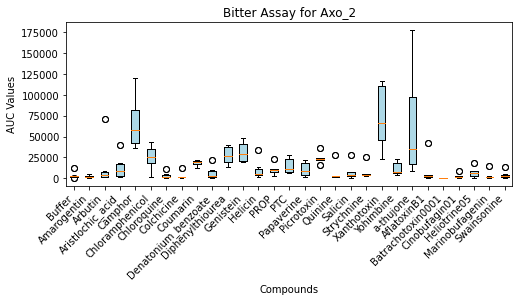

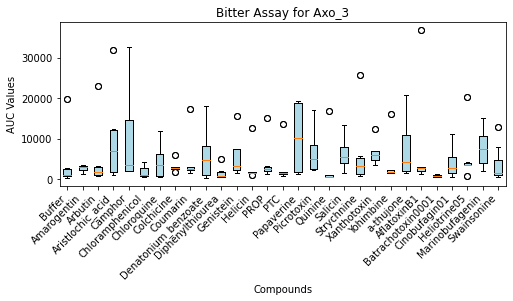

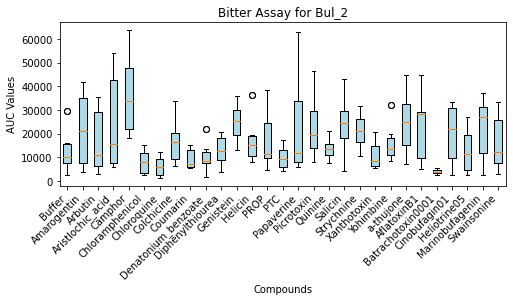

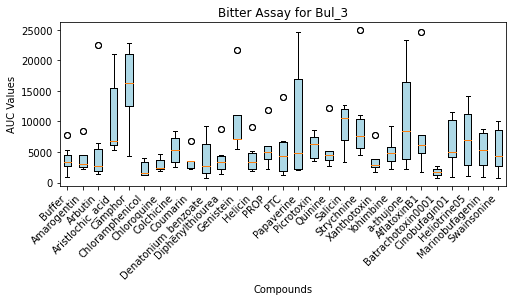

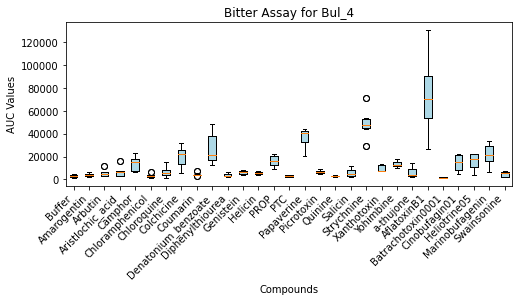

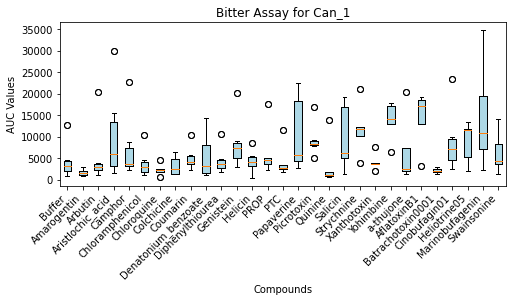

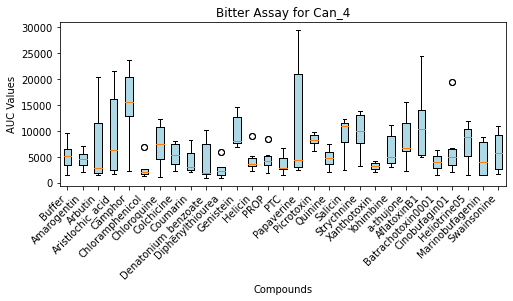

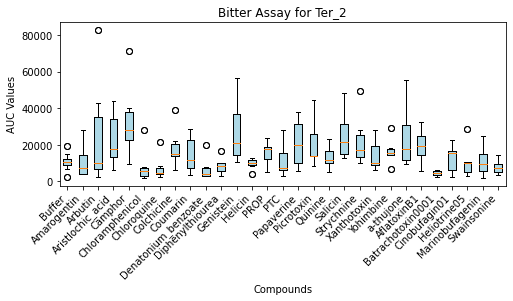

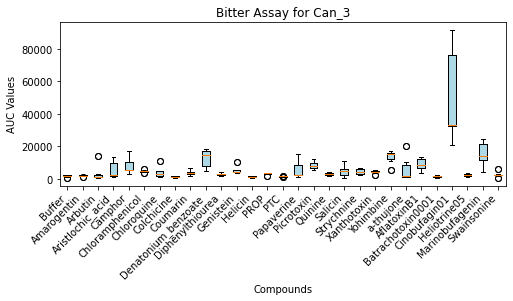

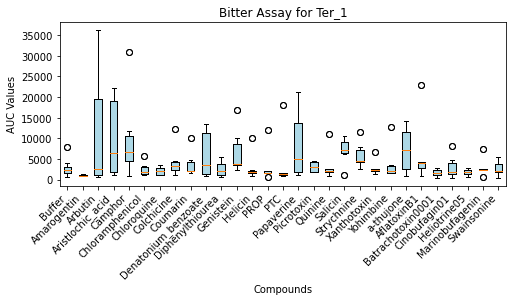

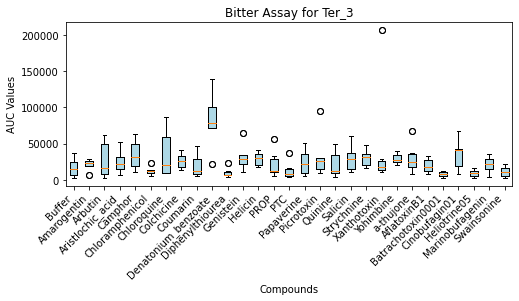

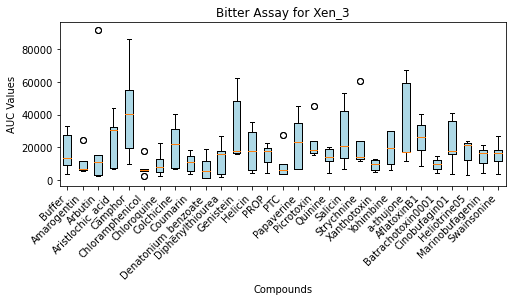

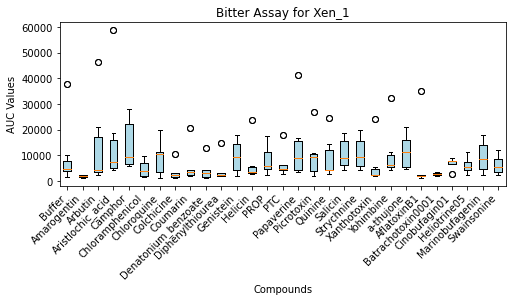

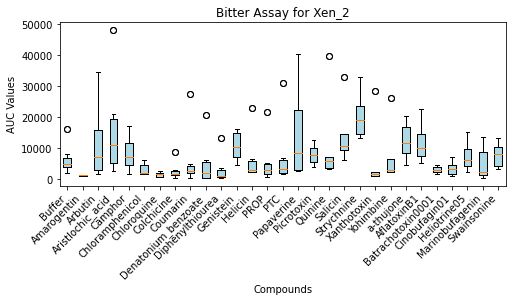

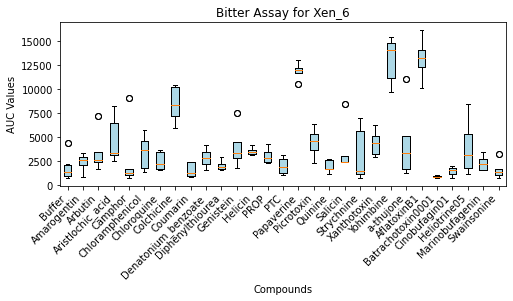

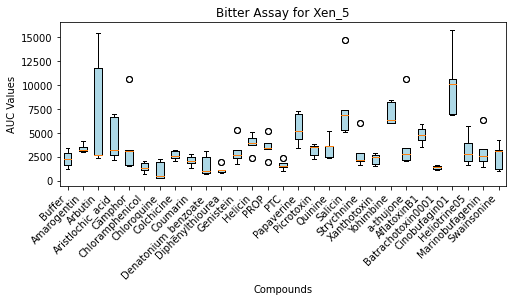

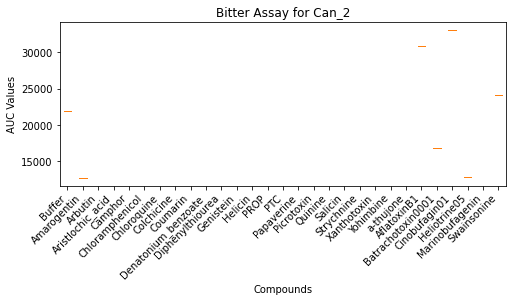

In [124]:
for gene in unique_genes:
    output_file = os.path.join(output_dir, f'{gene}_boxplot.jpg')
    plot_all_chems(raw, gene, output_file=output_file)

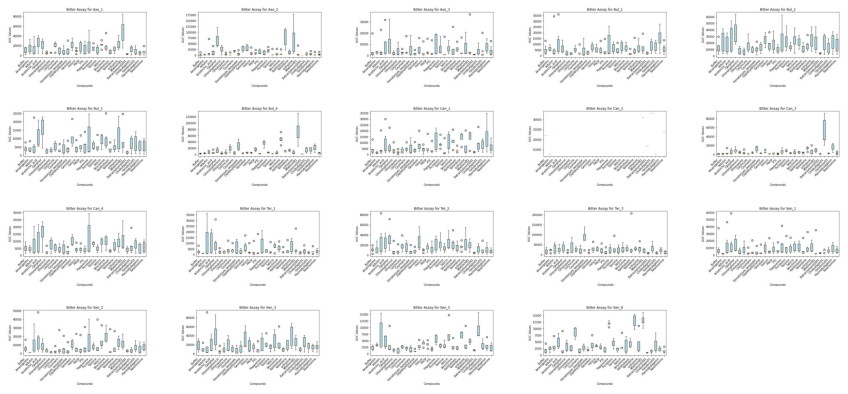

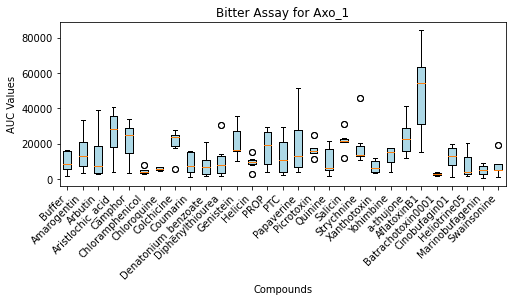

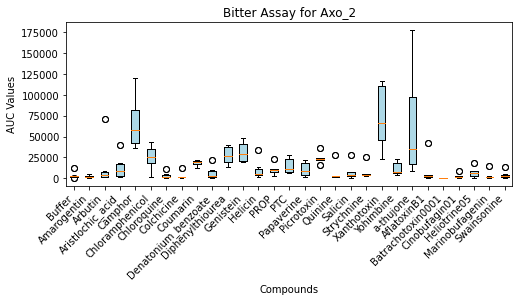

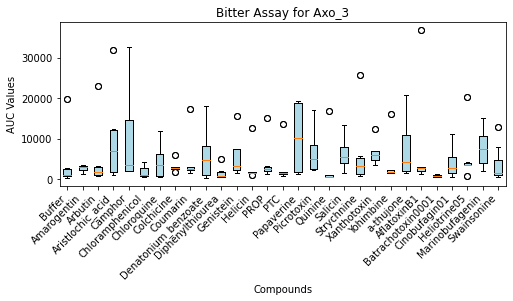

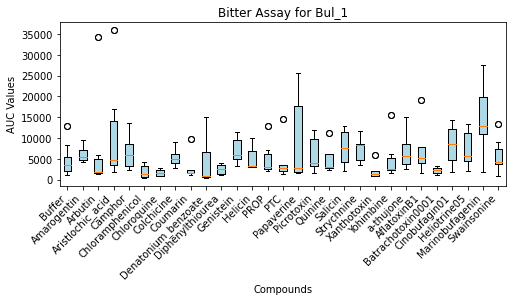

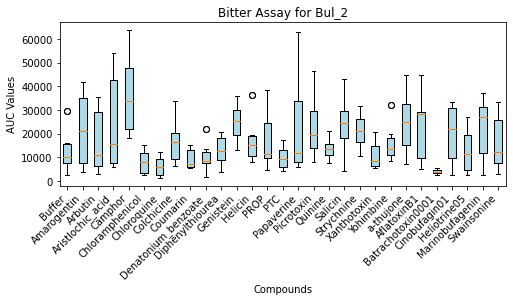

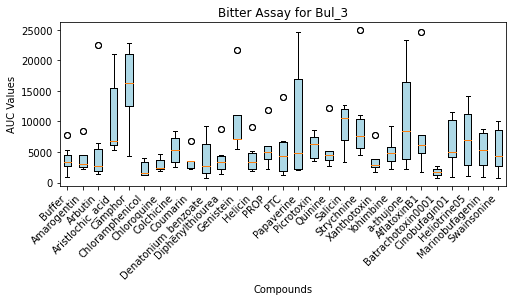

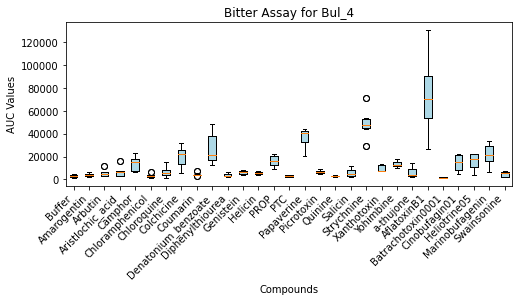

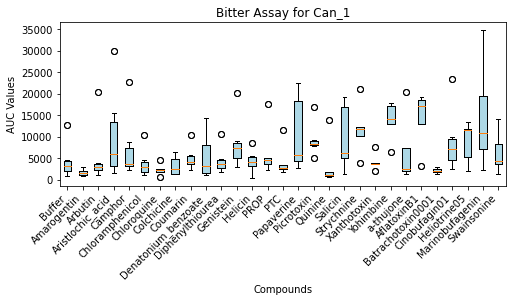

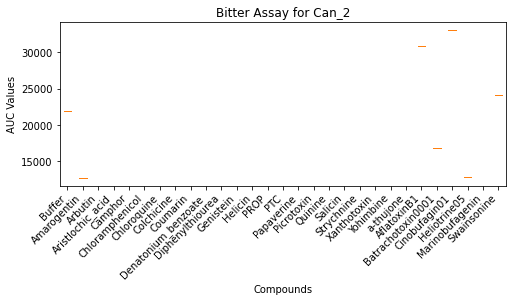

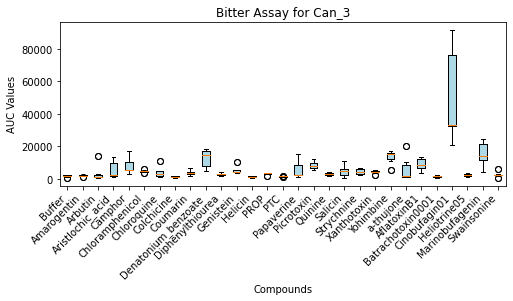

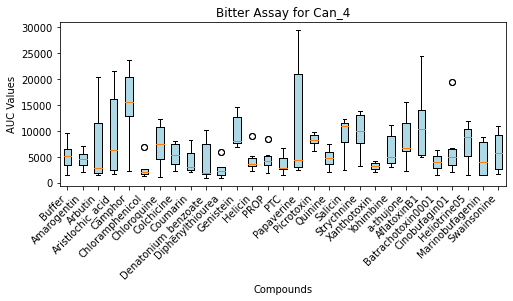

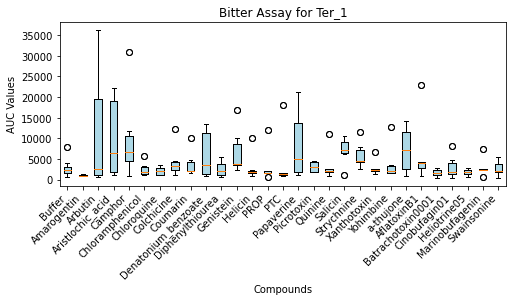

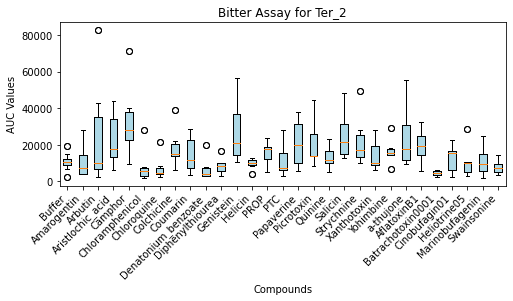

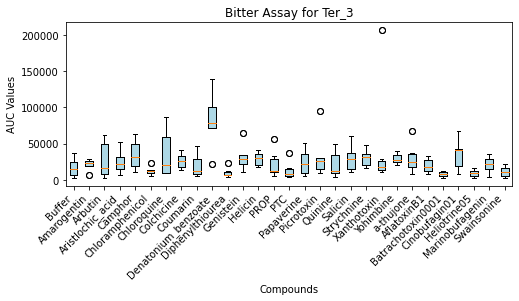

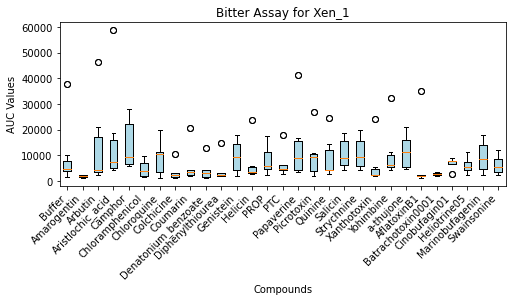

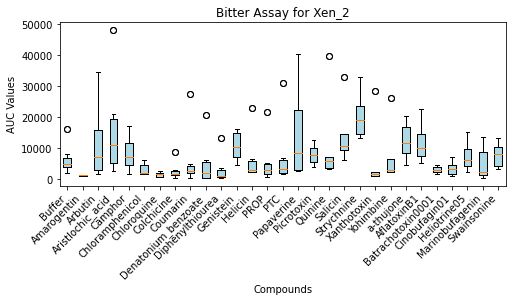

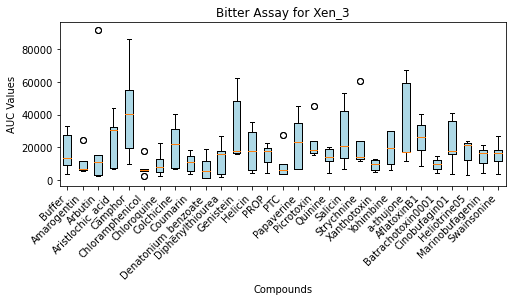

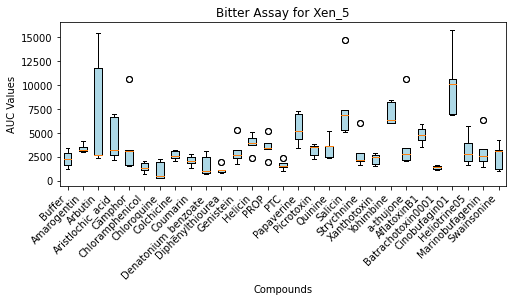

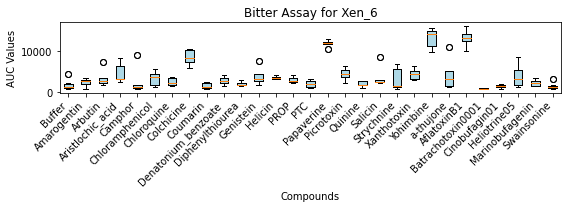

In [136]:
# Assuming 'raw' is your DataFrame
unique_genes = raw['gene'].unique()

# Determine the number of rows and columns for the grid
num_rows = 4
num_cols = 5

# Assuming 'raw' is your DataFrame
unique_genes = sorted(unique_genes, key=str.lower)

# Create a directory if it doesn't exist
output_dir = '/lab/wengpj01/assay/20231012/'
os.makedirs(output_dir, exist_ok=True)

# Create a figure and axes for the grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 7))

for i, gene in enumerate(unique_genes):
    output_file = os.path.join(output_dir, f'{gene}_boxplot.jpg')
    ax = axes[i // num_cols, i % num_cols]  # Get the current subplot
    plot_all_chems(raw, gene, output_file=output_file)
    img = plt.imread(output_file)  # Read the saved image
    ax.imshow(img)
    ax.axis('off')

# Remove empty subplots, if any
for i in range(len(unique_genes), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()

# Save the entire grid as a high-resolution PDF
output_pdf = os.path.join(output_dir, 'All_assays.pdf')
fig.savefig(output_pdf, format='pdf', dpi=1000, bbox_inches='tight')  # Set the DPI to your desired value
# plt.show()

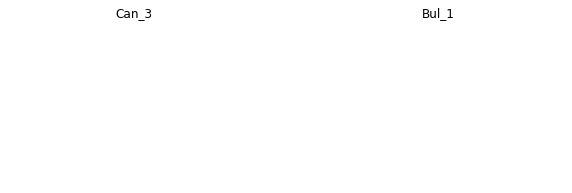

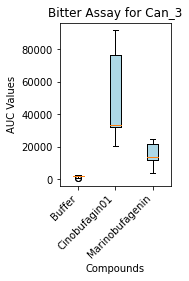

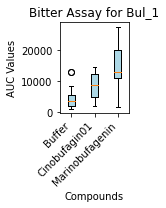

In [152]:
def plot_and_save_genes(df, genes, compounds, output_file):
    num_genes = len(genes)
    
    fig, axes = plt.subplots(1, num_genes, figsize=(num_genes * 5, 3))

    for i, gene in enumerate(genes):
        ax = axes[i]
        plot_all_chems(df, gene, compounds)
        ax.axis('off')
        ax.set_title(gene)
        output_file1 = os.path.join(output_dir, f'{gene}_{compounds[1]}.jpg')
        plt.savefig(output_file1, format='jpg', dpi=300, bbox_inches='tight')

    plt.tight_layout()

#     # Save the entire grid as a high-resolution PDF
#     plt.savefig(output_file, format='pdf', dpi=300, bbox_inches='tight')
#     plt.show()


# Example usage
#genes = ["Axo_2", "Bul_3", "Can_4", "Ter_1","Xen_3"]
# genes = ["Axo_1", "Bul_4", "Can_3", "Xen_6"]
genes = ["Can_3", "Bul_1"]
compounds = ["Buffer", "Cinobufagin01", "Marinobufagenin"]

output_file = '/lab/wengpj01/assay/20231012/aflatoxin.pdf'
plot_and_save_genes(raw, genes, compounds, output_file)